In [1]:
import datetime as dt
import pandas as pd
import pandas_datareader.data as pd_reader
import math
import matplotlib as plt


plt.rcParams['figure.figsize'] = (30.0, 20.0)

In [3]:
# financial data obtained from http://data.okfn.org.
spx500_constituents = pd.read_csv("constituents.csv")
spx500_constituents_financials = pd.read_csv("constituents-financials.csv")
# pricing data obtained from yahoo finance.


In [4]:
spx500_constituents_financials["Price/Earnings"]

0       22.77
1       25.79
2       19.29
3       19.45
4       37.06
5       43.23
6       54.68
7       25.20
8       28.99
9       17.62
10      15.55
11      11.93
12      32.35
13      56.99
14      31.85
15       8.65
16      18.13
17        NaN
18     188.23
19      40.59
20      21.53
21      22.65
22      24.30
23      17.00
24      29.21
25      28.71
26      25.20
27     307.42
28      20.62
29       2.69
        ...  
474     26.64
475     39.61
476     60.09
477     16.32
478     28.27
479     26.87
480     25.91
481     11.74
482     34.40
483     13.94
484     12.22
485       NaN
486     37.86
487     18.27
488     22.91
489       NaN
490     26.71
491     24.35
492     14.46
493     29.01
494     21.13
495     38.31
496     22.91
497      8.31
498     24.53
499       NaN
500     28.29
501    307.61
502     20.45
503     63.98
Name: Price/Earnings, dtype: float64

In [5]:
end = dt.datetime(2017, 2, 18)
start = dt.datetime(2016, 2,18)
spx500_constituents_prices = pd.DataFrame()

for ticker in spx500_constituents["Symbol"]:
    price = pd_reader.DataReader(ticker, 'yahoo', start, end)
    spx500_constituents_prices[ticker] = price['Adj Close']

In [6]:
spx500_constituents_pct_change = spx500_constituents_prices.pct_change().dropna(how='all')


In [7]:
spx500_constituents_pct_change

MMM       ABT      ABBV       ACN      ATVI       AYI  \
Date                                                                     
2016-02-19 -0.002105  0.005743 -0.004766  0.004365  0.045360 -0.016625   
2016-02-22  0.007990  0.016351  0.018235  0.014149  0.044054  0.033811   
2016-02-23 -0.009702 -0.019663 -0.003799 -0.006976 -0.025063 -0.001519   
2016-02-24  0.006723  0.021099 -0.003269 -0.001003  0.031891 -0.002383   
2016-02-25  0.011258  0.010969  0.023866  0.013661  0.019237  0.039238   
2016-02-26 -0.004529 -0.002776 -0.003559  0.002081 -0.013304  0.020883   
2016-02-29 -0.008846 -0.019737 -0.024821 -0.008505 -0.006899  0.003305   
2016-03-01  0.017339  0.015230  0.031679  0.031817  0.017051  0.036385   
2016-03-02 -0.001128  0.000254 -0.011360 -0.007636 -0.006209  0.015250   
2016-03-03 -0.000188 -0.013218  0.004129  0.001364 -0.015308  0.008032   
2016-03-04  0.004329  0.009274  0.003933  0.003696 -0.010470 -0.008238   
2016-03-07  0.003124  0.000000  0.004452 -0.007560 -0.006733 -0.022742   
2016-03-08 -0.002304 -0.000255 -0.019149  0.002148 -0.006456 -0.005388   
2016-03-09 -0.000687  0.002808  0.019342  0.007601  0.002599  0.000654   
2016-03-10 -0.001249 -0.006365 -0.002837  0.001741  0.012638 -0.008121   
2016-03-11  0.012446  0.034333  0.026676  0.020274  0.008640  0.014680   
2016-03-14 -0.000432  0.003220 -0.009007  0.006056  0.028236  0.001298   
2016-03-15  0.003708 -0.014815 -0.027792  0.007054  0.002160  0.010003   
2016-03-16  0.002955  0.007018  0.012406  0.004857  0.009544  0.022101   
2016-03-17  0.005280  0.002738 -0.017581  0.009016 -0.005795  0.007671   
2016-03-18  0.009649  0.012410  0.022596 -0.007277 -0.012270 -0.019500   
2016-03-21 -0.002964 -0.000736 -0.009899  0.003619 -0.004969  0.003632   
2016-03-22  0.000425  0.006624  0.026602 -0.003051  0.015605 -0.001312   
2016-03-23 -0.003881 -0.006093 -0.019826 -0.001577  0.001229 -0.013364   
2016-03-24  0.001157 -0.000736 -0.004258  0.061676 -0.011357 -0.013269   
2016-03-28  0.011066  0.003190 -0.000178 -0.001137  0.005947  0.002838   
2016-03-29 -0.011366  0.014432  0.016753  0.009547  0.034225  0.013224   
2016-03-30  0.014356  0.004340 -0.000876  0.000954  0.024970 -0.009250   
2016-03-31 -0.000720  0.004322  0.002105  0.000260 -0.006751  0.008274   
2016-04-01  0.005401  0.008606  0.005252  0.008232  0.017139  0.023838   
...              ...       ...       ...       ...       ...       ...   
2017-01-06  0.002926  0.027204  0.000314  0.011392 -0.000791 -0.005489   
2017-01-09 -0.005386 -0.000981  0.006584 -0.011178 -0.005539 -0.146823   
2017-01-10 -0.003892  0.013500 -0.002180  0.000522  0.018037  0.031752   
2017-01-11  0.007419  0.001341 -0.036103  0.009213  0.021365  0.006605   
2017-01-12 -0.002530 -0.008763  0.002290 -0.002928 -0.001786  0.022157   
2017-01-13 -0.000282  0.005157  0.011586  0.010105 -0.004600  0.000930   
2017-01-17 -0.000733 -0.000733 -0.002097 -0.007867  0.000000 -0.020587   
2017-01-18  0.006939 -0.003423 -0.003233 -0.000689  0.003338 -0.021210   
2017-01-19  0.001064 -0.008832 -0.004541 -0.003881 -0.005630  0.001455   
2017-01-20 -0.001063  0.001485 -0.003747 -0.003723  0.002831  0.006830   
2017-01-23  0.000112 -0.002966 -0.003107 -0.002173 -0.011291 -0.002357   
2017-01-24 -0.014229 -0.000744 -0.006234  0.014457  0.014794  0.007378   
2017-01-25  0.004319  0.000000  0.013206  0.009358  0.011765  0.008712   
2017-01-26  0.000509  0.016125 -0.001792 -0.013949 -0.002275  0.006169   
2017-01-27  0.003733  0.000977 -0.020728 -0.005003  0.003547 -0.031412   
2017-01-30 -0.011607  0.000244  0.007167 -0.006242  0.000000 -0.002483   
2017-01-31 -0.003420  0.018532  0.011253 -0.006630  0.015148  0.011618   
2017-02-01  0.002002  0.013407 -0.003600 -0.005796  0.006466 -0.005405   
2017-02-02 -0.005652  0.009922  0.000000  0.003798  0.000000 -0.000194   
2017-02-03  0.004937  0.000702 -0.003613  0.007480 -0.011367  0.001359   
2017-02-06  0.000343 -0.008181 -0.000330 -0.002708  0.004499  0.002375   
2017-02-07  0.003769 

In [8]:
# getting percentage gain instead of absolute prices

spx500_constituents_pct_change.plot(legend=False)


In [9]:
def getlog(x):
    try:
        return math.log(x)
    except:
        return x
spx500_constituents_prices.pct_change()[spx500_constituents["Symbol"]].apply(getlog, axis=1).plot(legend=False)

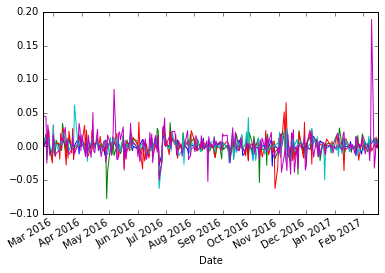

In [10]:
%matplotlib inline 

spx500_constituents_pct_change.ix[:, :5].plot(legend=False)


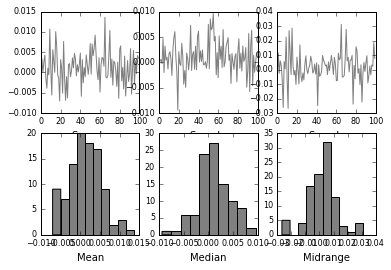

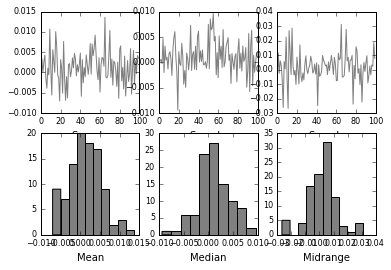

In [11]:
from pandas.tools.plotting import bootstrap_plot
bootstrap_plot(spx500_constituents_pct_change["AAPL"], size=10, samples=100, color='grey')



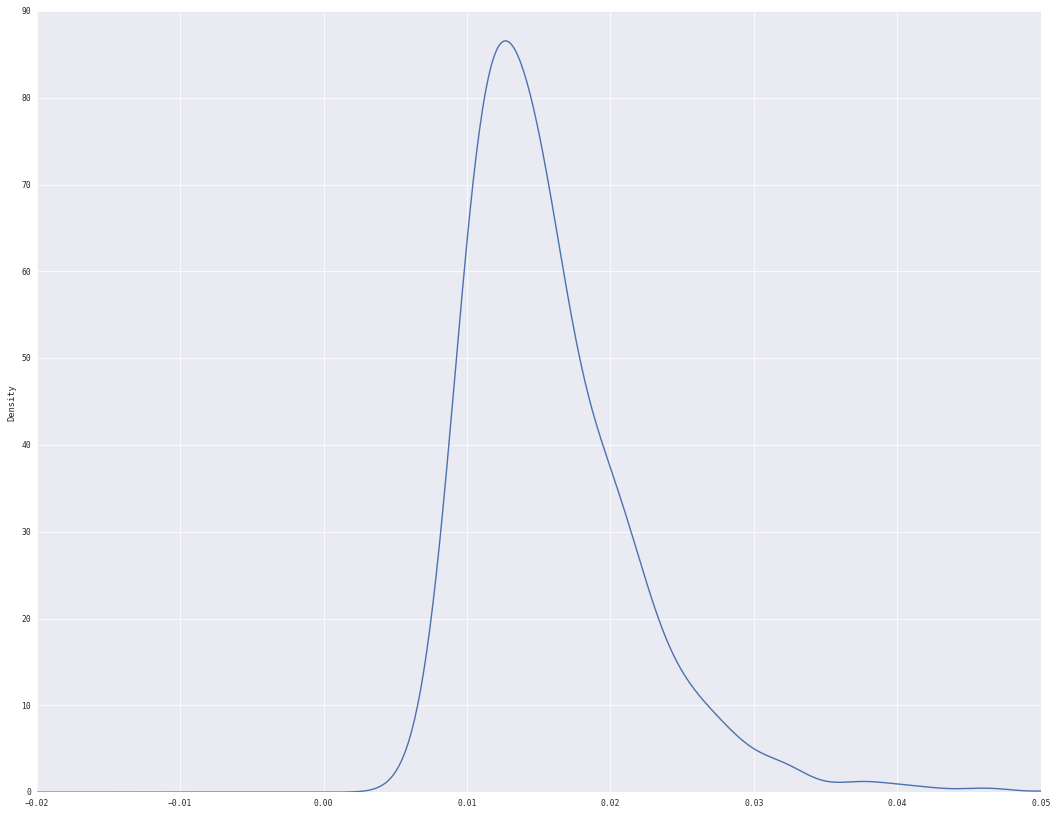

In [213]:
ax = spx500_constituents_pct_change.std().plot(kind='kde', figsize=(18,14), xlim=[-0.02, 0.05])


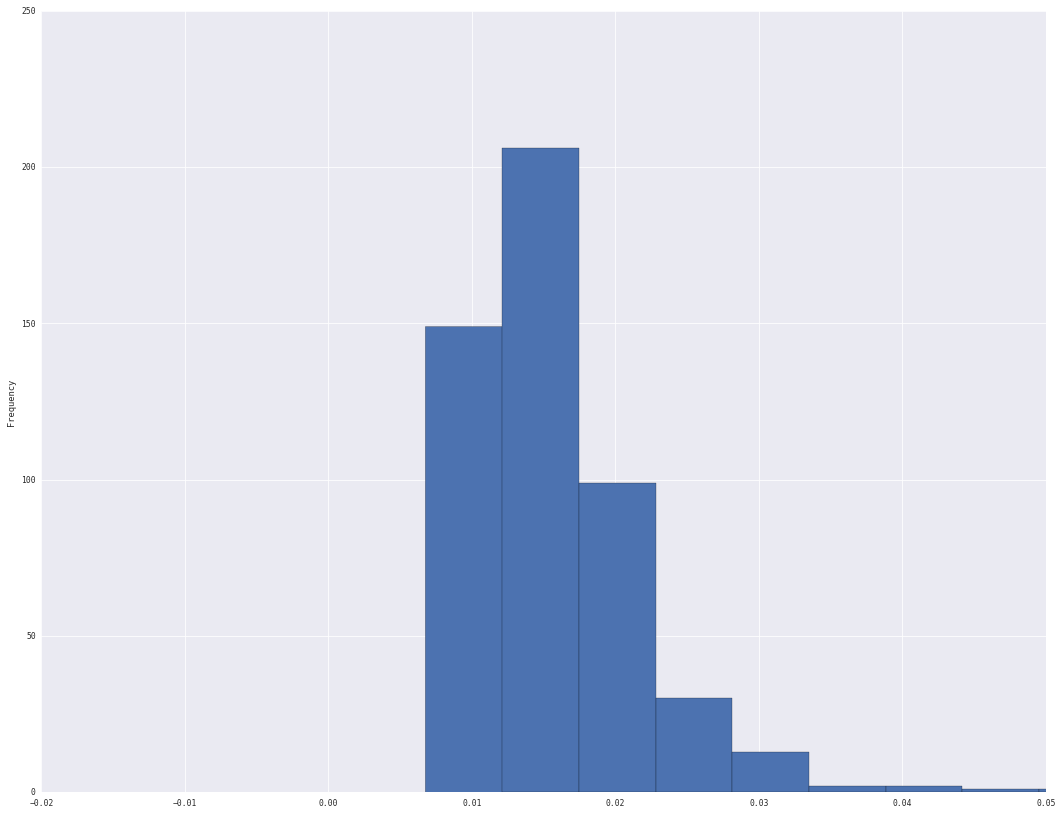

In [218]:
ax = spx500_constituents_pct_change.std().plot(kind='hist', figsize=(18,14), xlim=[-0.02, 0.05])


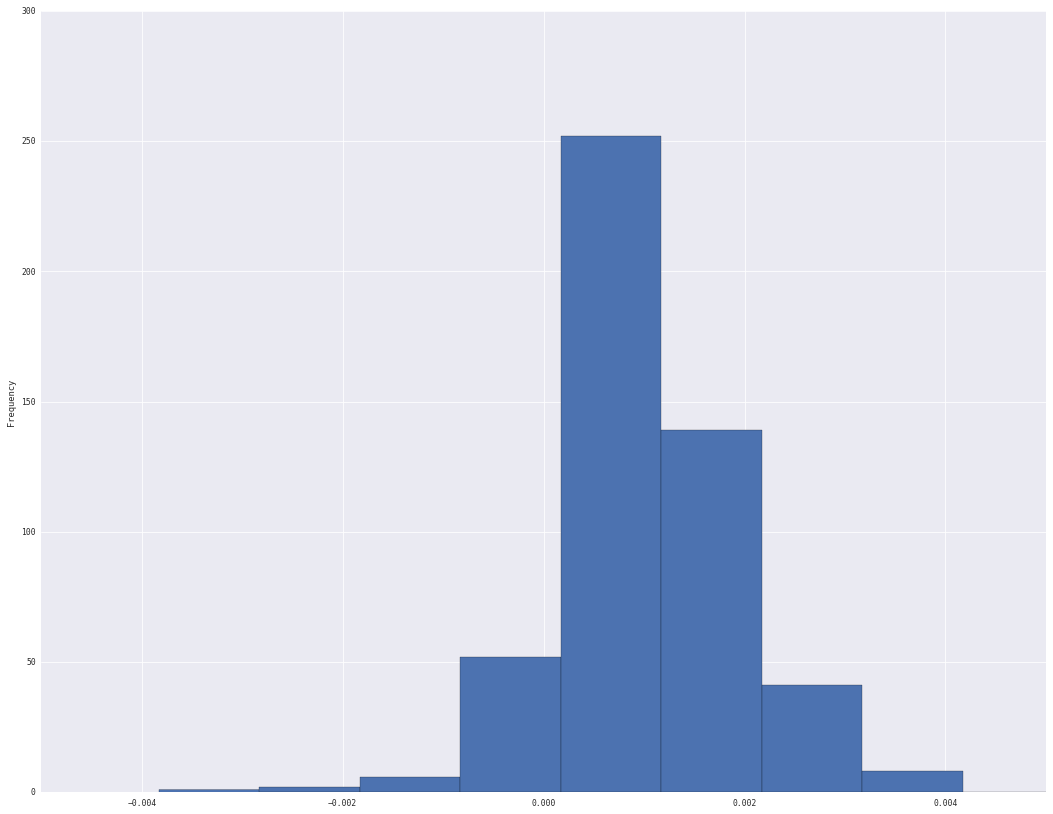

In [219]:
ax = spx500_constituents_pct_change.mean().plot(kind='hist', figsize=(18,14), xlim=[-0.005, 0.005])


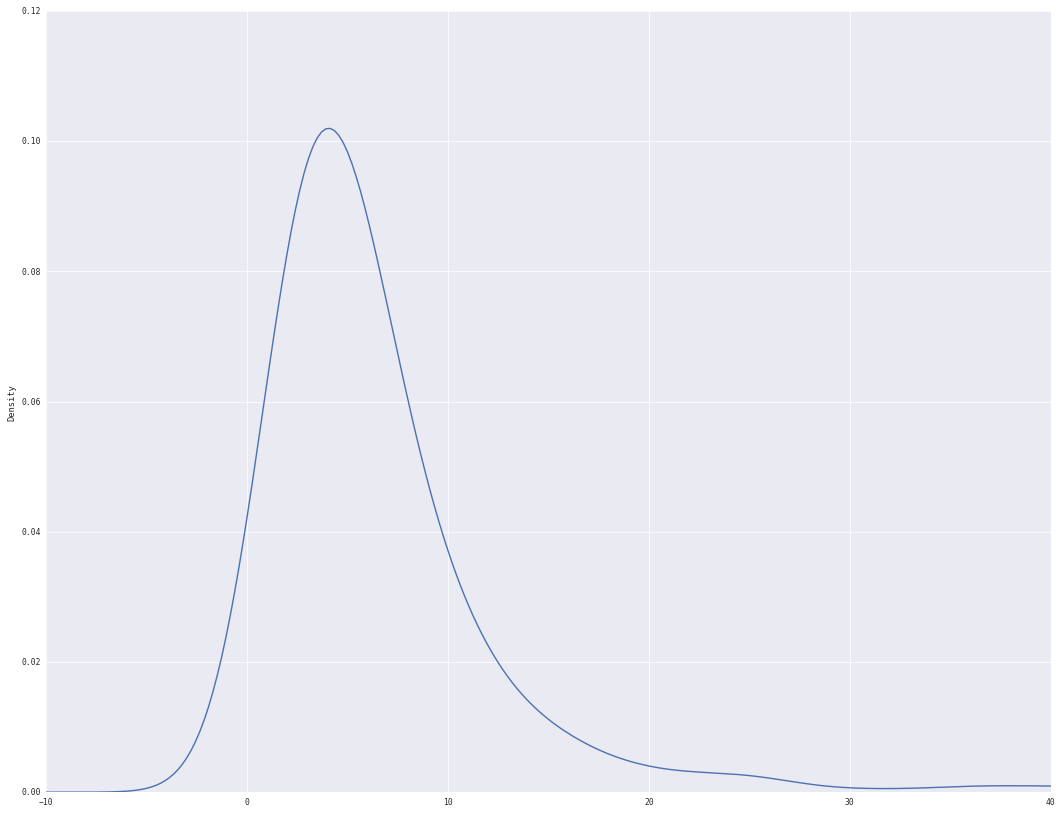

In [204]:
ax = spx500_constituents_prices.std().plot(kind='kde', figsize=(18,14), xlim=[-10, 40])

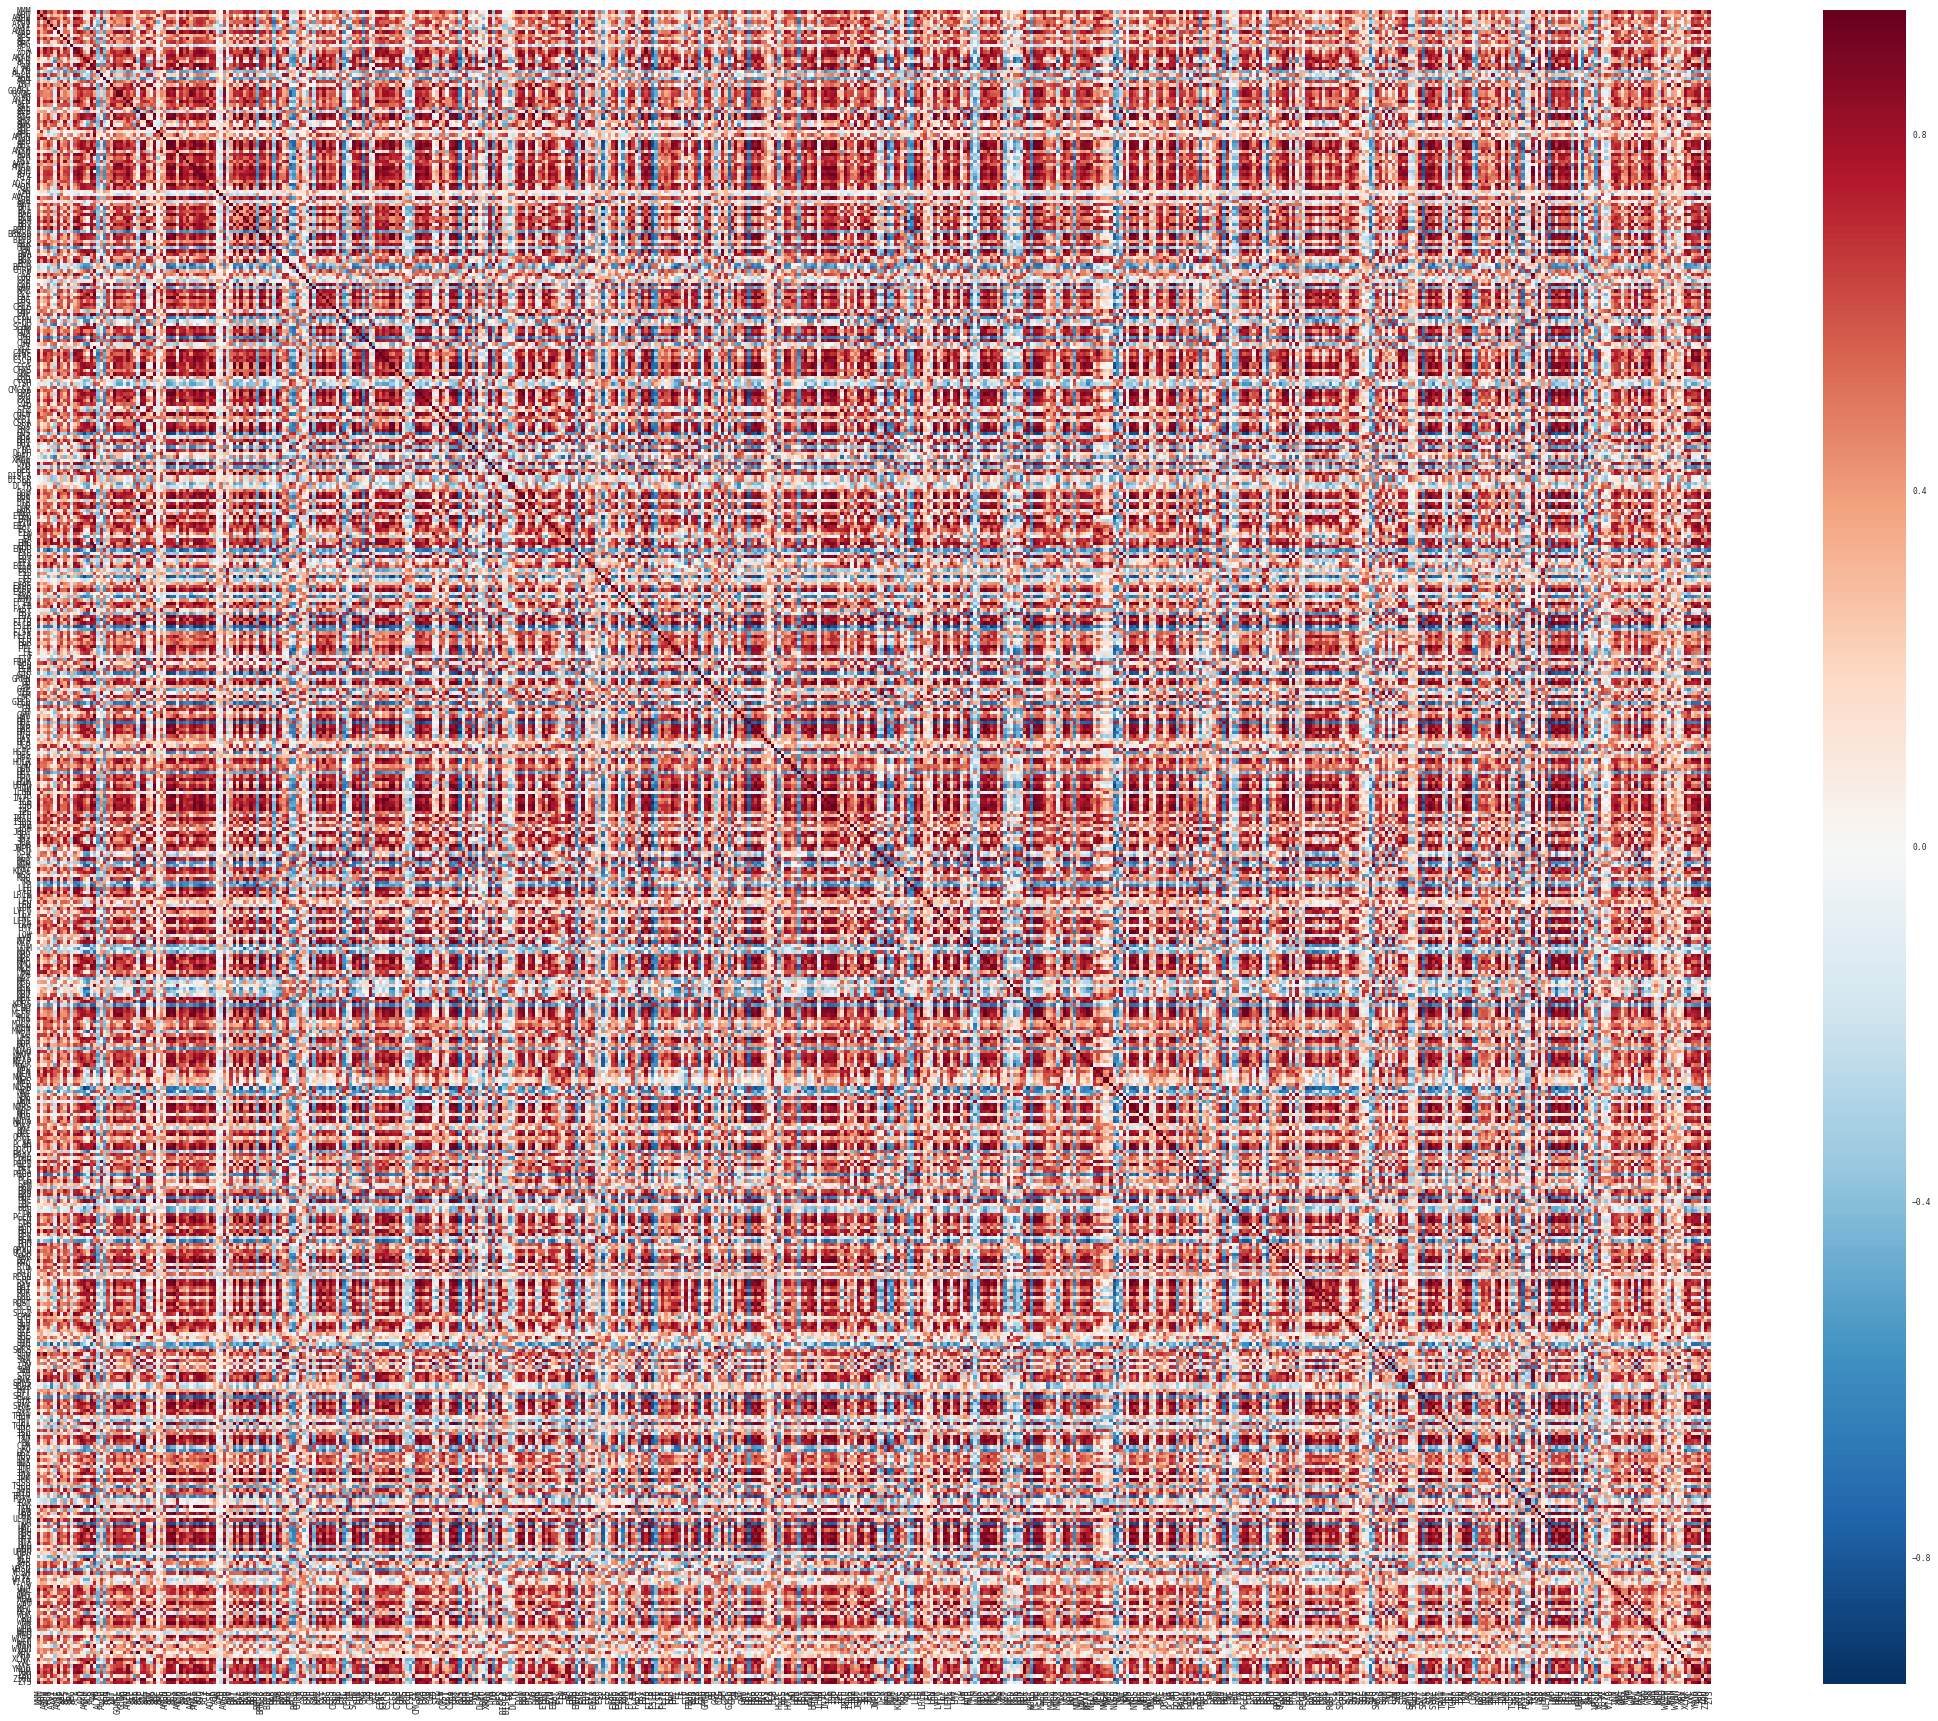

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(40,30))
sns.set(context="paper", font="monospace")
corrmat = spx500_constituents_prices.corr()
fig = sns.heatmap(corrmat, vmax=.5, square=True)
plt.show()
#spx500_constituents_financials["Price/Earnings"]
#f, ax = plt.subplots(figsize=(12, 9))
#networks = corrmat.columns.get_level_values("network")
#for i, network in enumerate(networks):
#    if i and network != networks[i - 1]:
#        ax.axhline(len(networks) - i, c="w")
#        ax.axvline(i, c="w")
#f.tight_layout()

In [14]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA



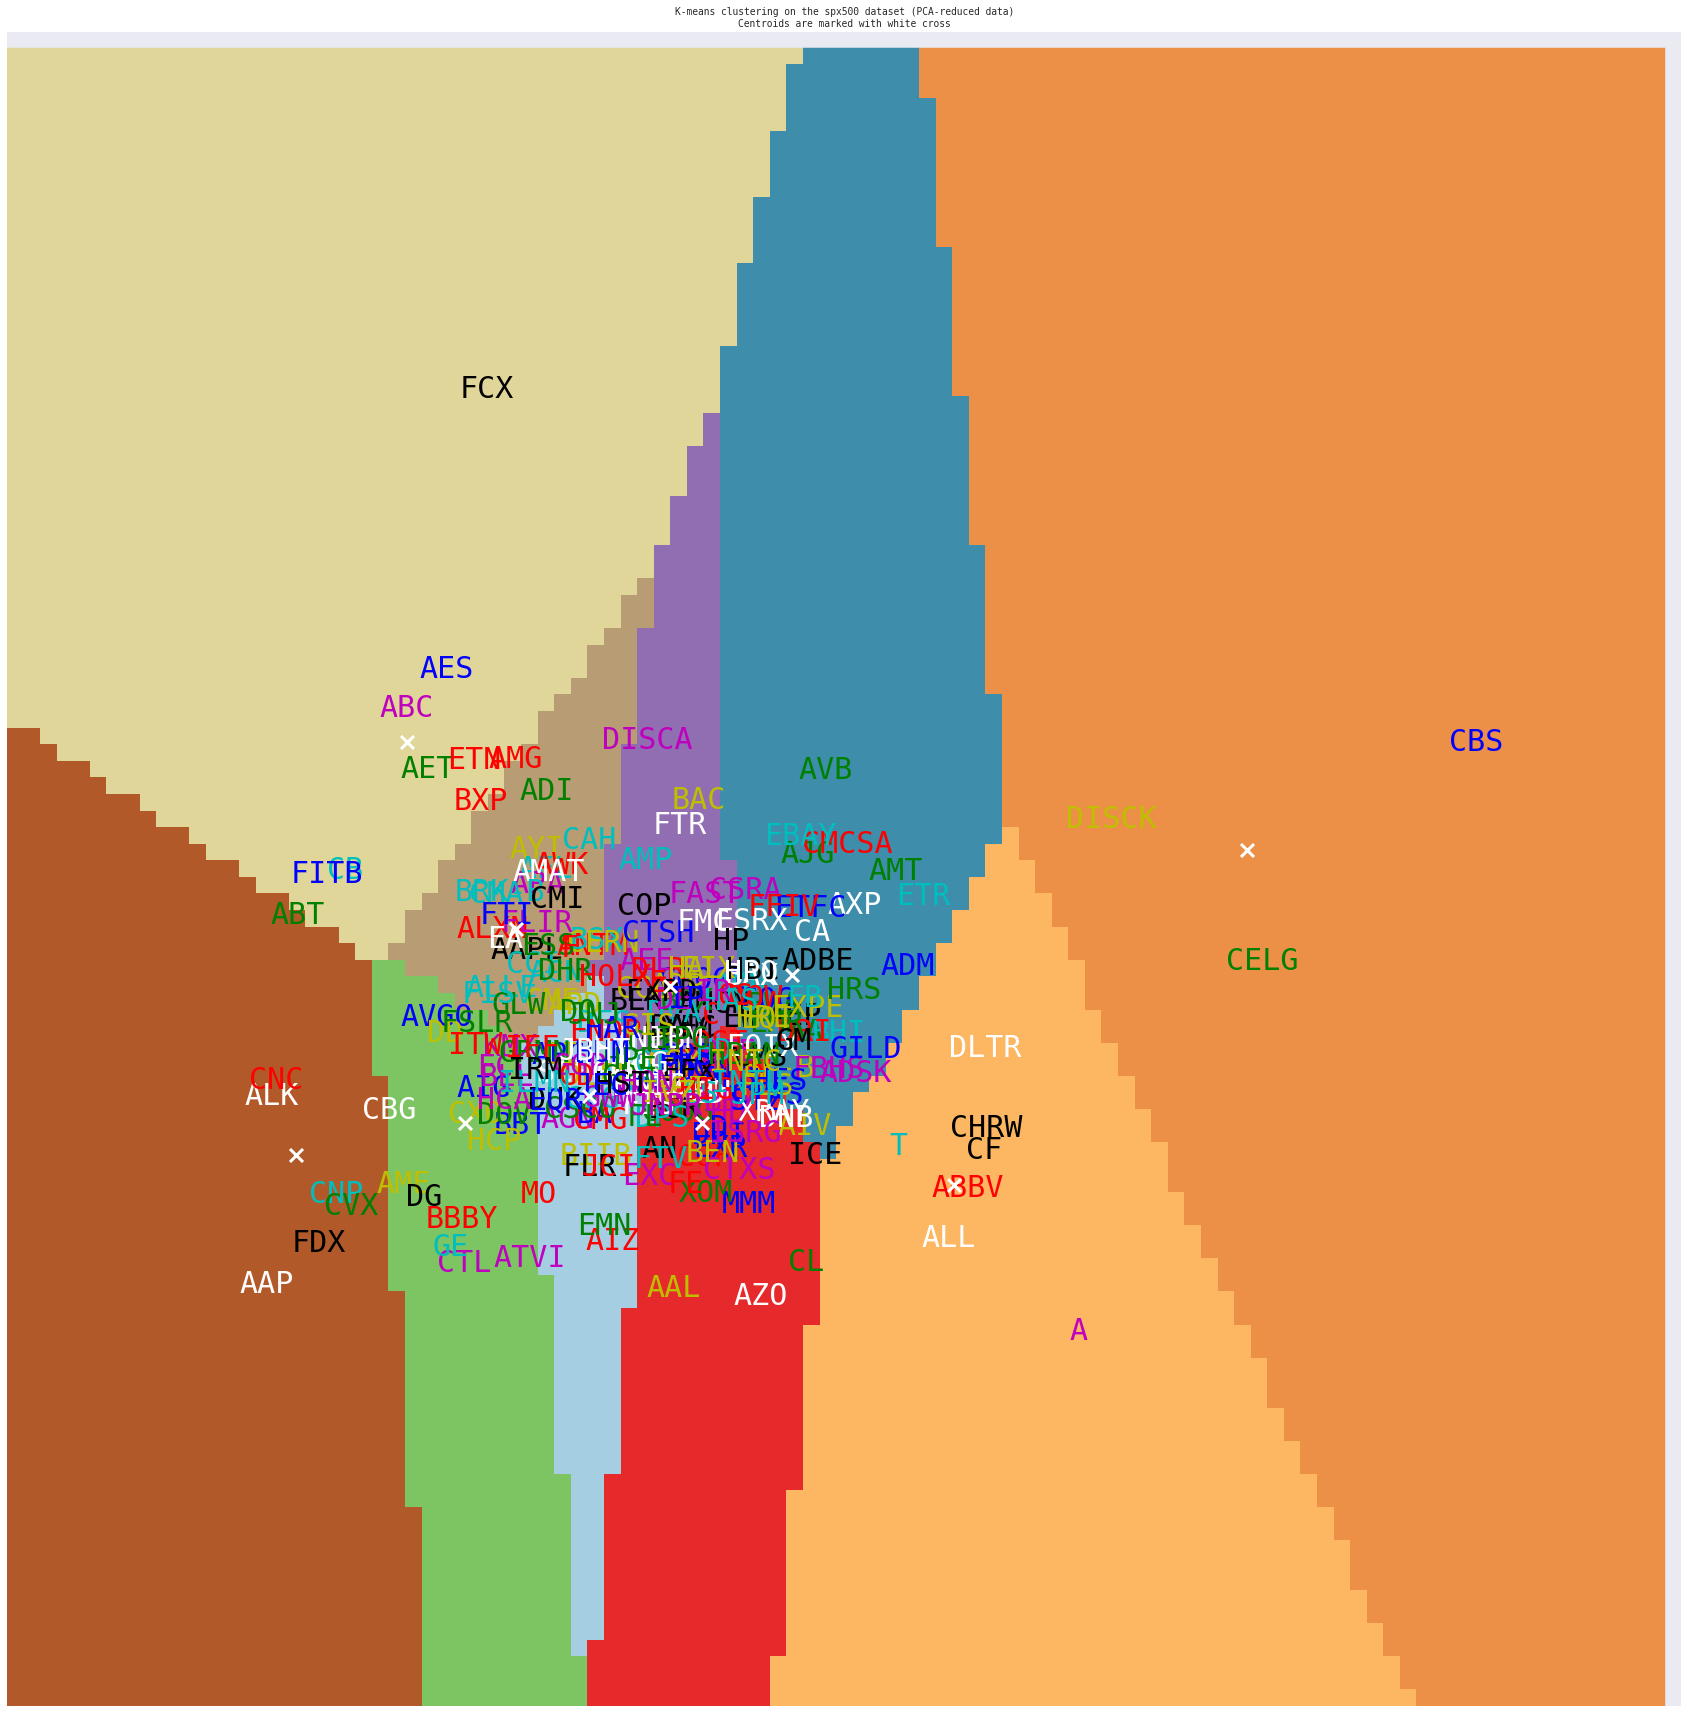

In [58]:
def group_plot(X):
    # h is the step siz
    h_n = 100
    reduced_data = PCA(n_components=2).fit_transform(X)
    kmeans = KMeans(n_clusters=10, random_state=0).fit(reduced_data)
    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].
    offset = 0.3
    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - offset, reduced_data[:, 0].max() + offset
    y_min, y_max = reduced_data[:, 1].min() - offset, reduced_data[:, 1].max() + offset
    xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/h_n), np.arange(y_min, y_max, (y_max-y_min)/h_n))

    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.figure(figsize=(30,30))
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    #plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=10)
    count = 0
    colors = "bgrcmykw"
    for i,j in zip(reduced_data[:, 0],reduced_data[:, 1]):
        corr = 0  # adds a little correction to put annotation in marker's centrum
        plt.annotate(spx500_constituents_pct_change.columns[count],  xy=(i + corr, j + corr), size= 30, color=colors[count%8])
        count += 1
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('K-means clustering on the spx500 dataset (PCA-reduced data)\n'
              'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()
group_plot(spx500_constituents_pct_change.fillna(0))

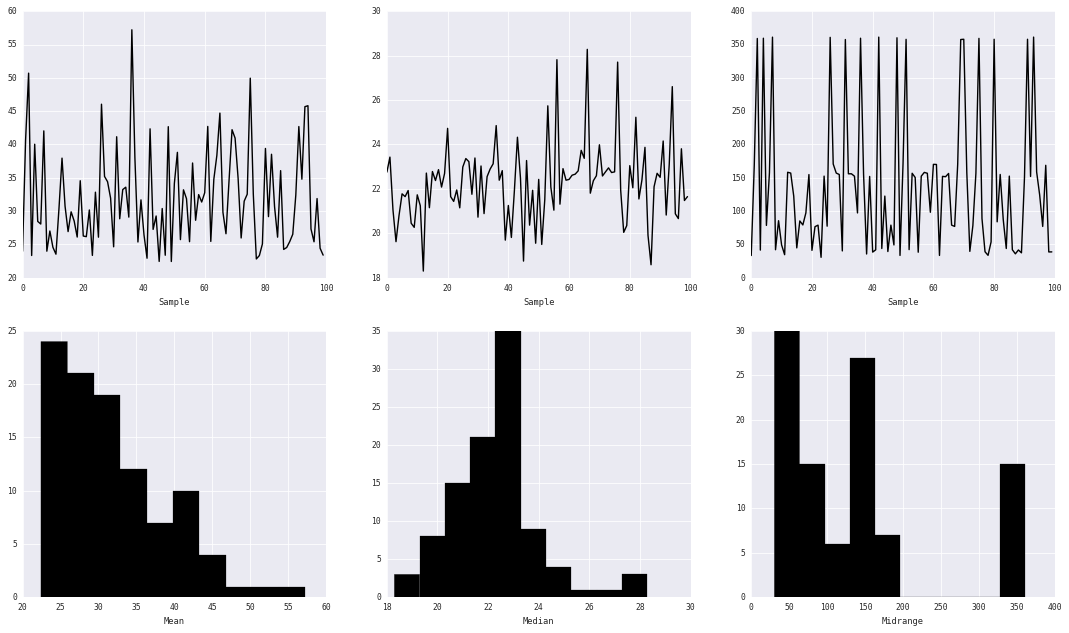

In [168]:
plt.figure(figsize=(30,30))
fig = bootstrap_plot(spx500_constituents_financials["Price/Earnings"].dropna(), size=50, samples=100, color='black')
fig.set_size_inches(18.5, 10.5)

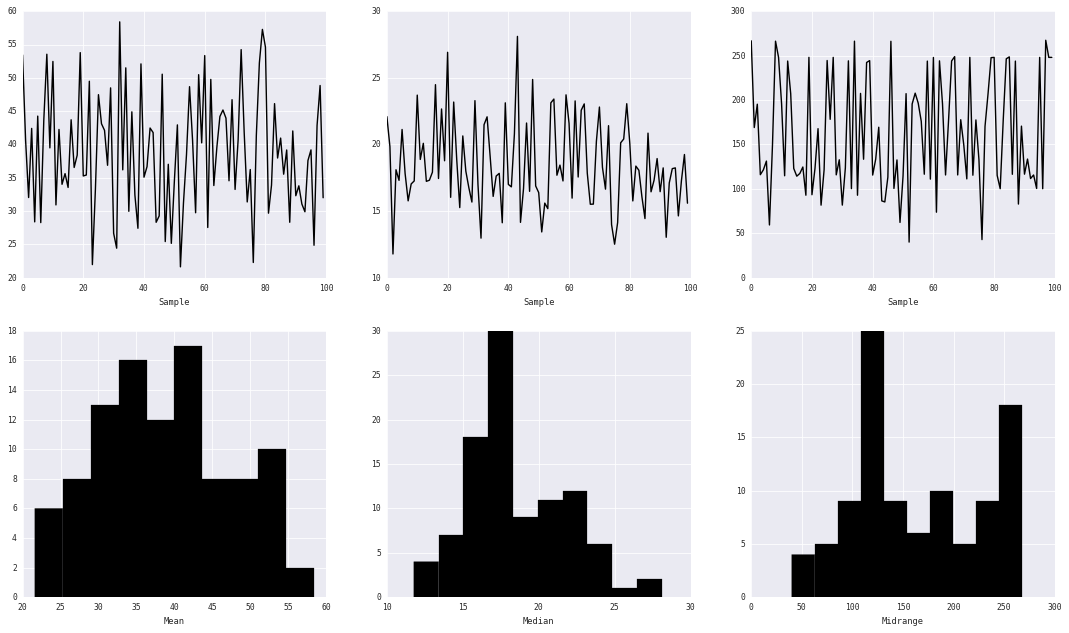

In [165]:

fig = bootstrap_plot(spx500_constituents_financials["Market Cap"].dropna(), size=50, samples=100, color='black')
fig.set_size_inches(18.5, 10.5)

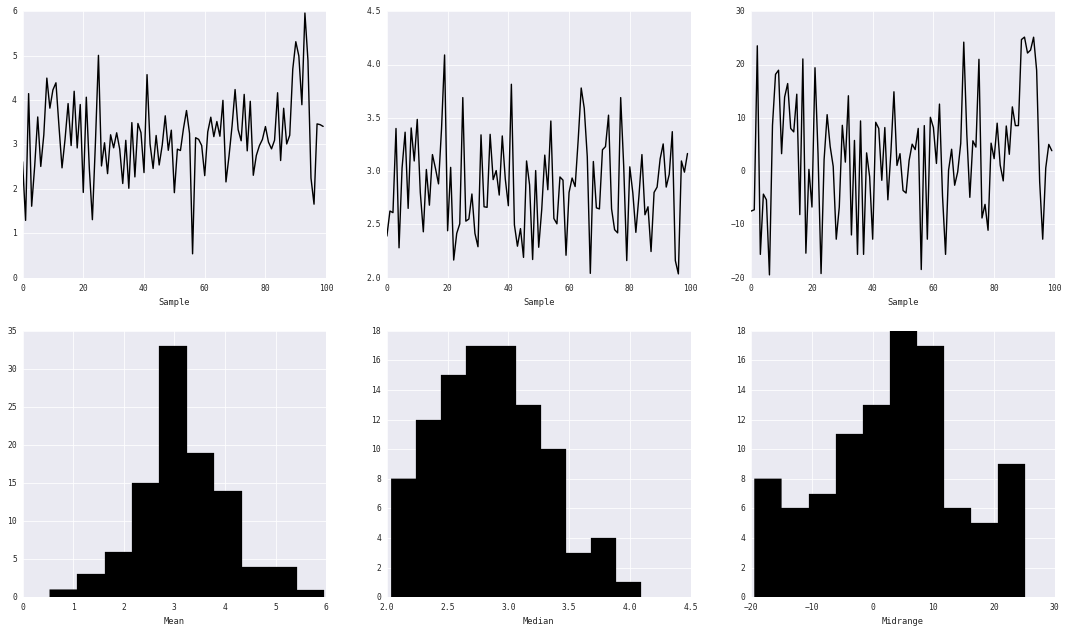

In [166]:
fig = bootstrap_plot(spx500_constituents_financials["Earnings/Share"].dropna(), size=50, samples=100, color='black')
fig.set_size_inches(18.5, 10.5)

In [167]:
annual_gain = spx500_constituents_prices.ix[-1, :] / spx500_constituents_prices.ix[0, :] 
spx500_constituents_financials["annual_gain_pct"] = (annual_gain.fillna(1)-1).reset_index(drop=True)*100


In [115]:

d = list( set(spx500_constituents_financials["Sector"]) )
def find_id(x):
    for i,e in enumerate(d):
        if e == x:
            return i
    return 0
        
spx500_constituents_financials["Sector_id"]=spx500_constituents_financials["Sector"].apply(find_id)

In [116]:
pd.concat([ spx500_constituents_financials, pd.get_dummies(spx500_constituents_financials["Sector"])],axis=1)

Symbol                           Name                  Sector   Price  \
0      MMM                     3M Company             Industrials  177.12   
1      ABT            Abbott Laboratories             Health Care   41.89   
2     ABBV                         AbbVie             Health Care   64.16   
3      ACN                  Accenture plc  Information Technology  115.11   
4     ATVI            Activision Blizzard  Information Technology   41.29   
5      AYI              Acuity Brands Inc             Industrials  264.62   
6     ADBE              Adobe Systems Inc  Information Technology   96.79   
7      AAP             Advance Auto Parts  Consumer Discretionary  164.85   
8      AES                       AES Corp               Utilities   12.32   
9      AET                      Aetna Inc             Health Care  117.00   
10     AMG  Affiliated Managers Group Inc              Financials  138.85   
11     AFL                      AFLAC Inc              Financials   72.49   
12       A       Agilent Technologies Inc             Health Care   45.48   
13     APD   Air Products & Chemicals Inc               Materials  144.35   
14    AKAM        Akamai Technologies Inc  Information Technology   56.38   
15     ALK           Alaska Air Group Inc             Industrials   59.86   
16     ALB                 Albemarle Corp               Materials   83.58   
17      AA                      Alcoa Inc               Materials    9.82   
18    ALXN        Alexion Pharmaceuticals             Health Care  124.42   
19    ALLE                       Allegion             Industrials   69.74   
20     AGN                   Allergan plc             Health Care  240.59   
21     ADS          Alliance Data Systems  Information Technology  200.96   
22     LNT            Alliant Energy Corp               Utilities   40.55   
23     ALL                  Allstate Corp              Financials   69.66   
24   GOOGL           Alphabet Inc Class A  Information Technology  717.78   
25    GOOG           Alphabet Inc Class C  Information Technology  705.63   
26      MO               Altria Group Inc        Consumer Staples   69.83   
27    AMZN                 Amazon.com Inc  Consumer Discretionary  745.81   
28     AEE                    Ameren Corp               Utilities   53.15   
29     AAL        American Airlines Group             Industrials   30.04   
..     ...                            ...                     ...     ...   
474      V                      Visa Inc.  Information Technology   76.42   
475    VNO           Vornado Realty Trust              Financials  100.46   
476    VMC               Vulcan Materials               Materials  123.61   
477    WMT                Wal-Mart Stores        Consumer Staples   73.84   
478    WBA       Walgreens Boots Alliance        Consumer Staples   81.80   
479     WM          Waste Management Inc.             Industrials   67.61   
480    WAT             Waters Corporation             Health Care  146.53   
481    WFC                    Wells Fargo              Financials   47.79   
482    HCN                 Welltower Inc.              Financials   75.62   
483    WDC                Western Digital  Information Technology   49.35   
484     WU               Western Union Co  Information Technology   19.57   
485    WRK                    Westrock Co               Materials   38.55   
486     WY             Weyerhaeuser Corp.              Financials   30.67   
487    WHR                Whirlpool Corp.  Consumer Discretionary  171.38   
488    WFM             Whole Foods Market        Consumer Staples   33.58   
489    WMB                  Williams Cos.                  Energy   20.99   
490   WLTW           Willis Towers Watson              Financials  125.06   
491    WEC   Wisconsin Energy Corporation               Utilities   65.03   
492    WYN              Wyndham Worldwide  Consumer Discretionary   72.35   
493   WYNN               Wynn Resorts Ltd  Consumer Discretionary   89.75   


In [87]:
pd.get_dummies(spx500_constituents_financials["Sector"]).columns

Index([u'Consumer Discretionary', u'Consumer Staples', u'Energy',
       u'Financials', u'Health Care', u'Industrials',
       u'Information Technology', u'Materials', u'Telecommunications Services',
       u'Utilities'],
      dtype='object')

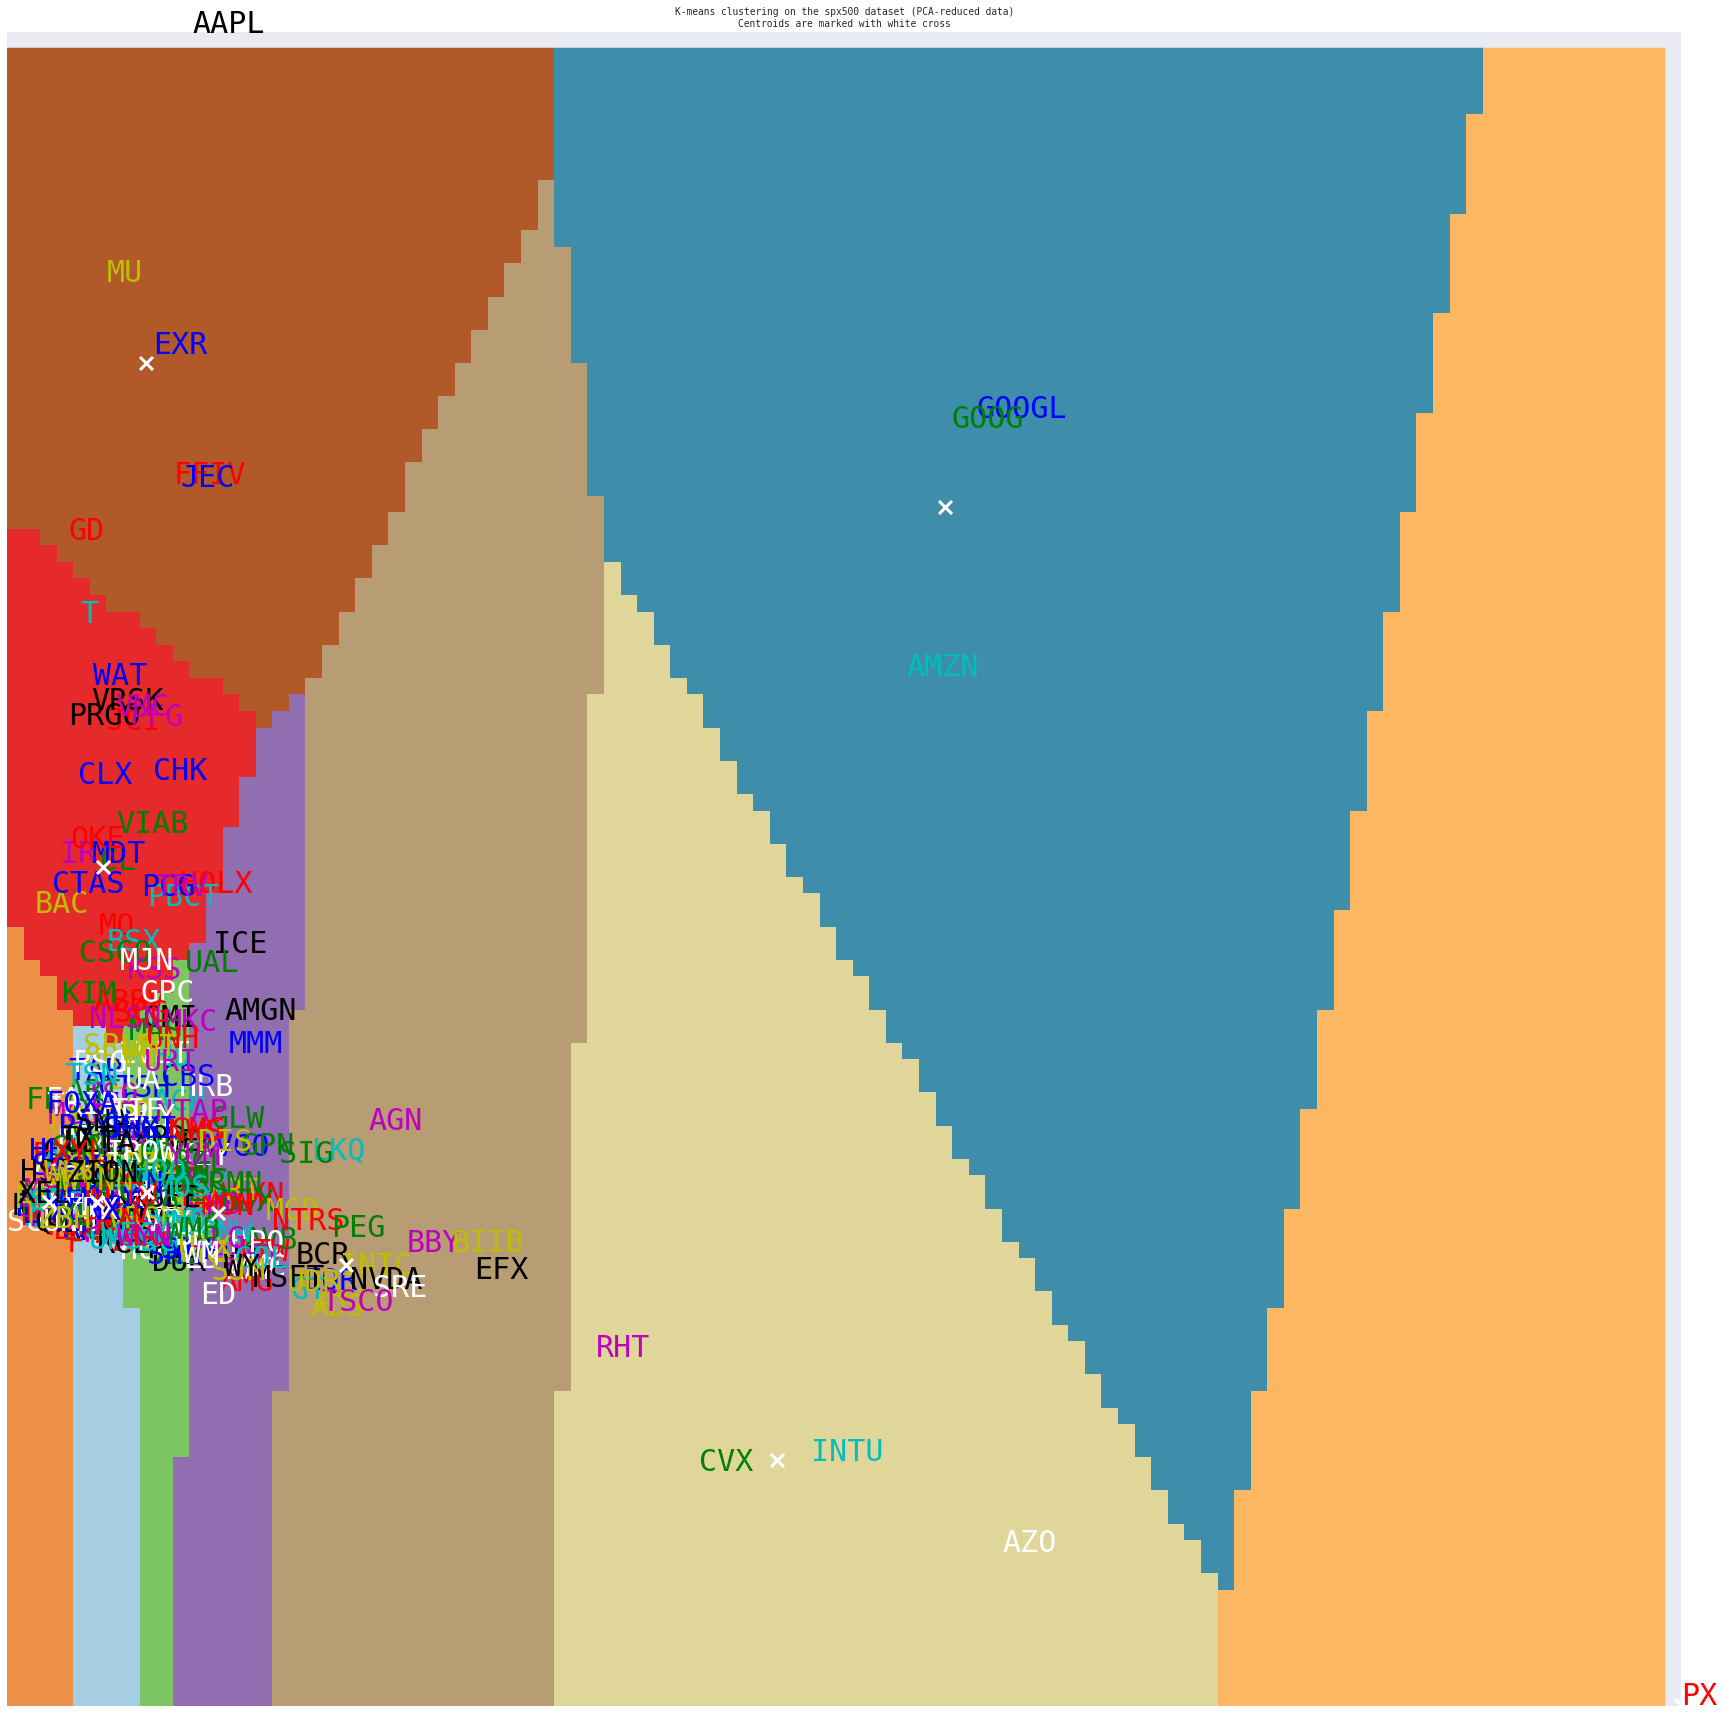

In [117]:
cols = [u'Price', u'Dividend Yield',
       u'Price/Earnings', u'Earnings/Share', u'Book Value', u'52 week low',
       u'52 week high', u'Market Cap', u'EBITDA', u'Price/Sales',
       u'Price/Book', u'annual_gain_pct', u'Consumer Discretionary', u'Consumer Staples', u'Energy',
       u'Financials', u'Health Care', u'Industrials',
       u'Information Technology', u'Materials', u'Telecommunications Services',
       u'Utilities']
all_df = pd.concat([ spx500_constituents_financials, pd.get_dummies(spx500_constituents_financials["Sector"])],axis=1)
group_plot( all_df[cols].fillna(0).drop(67) )

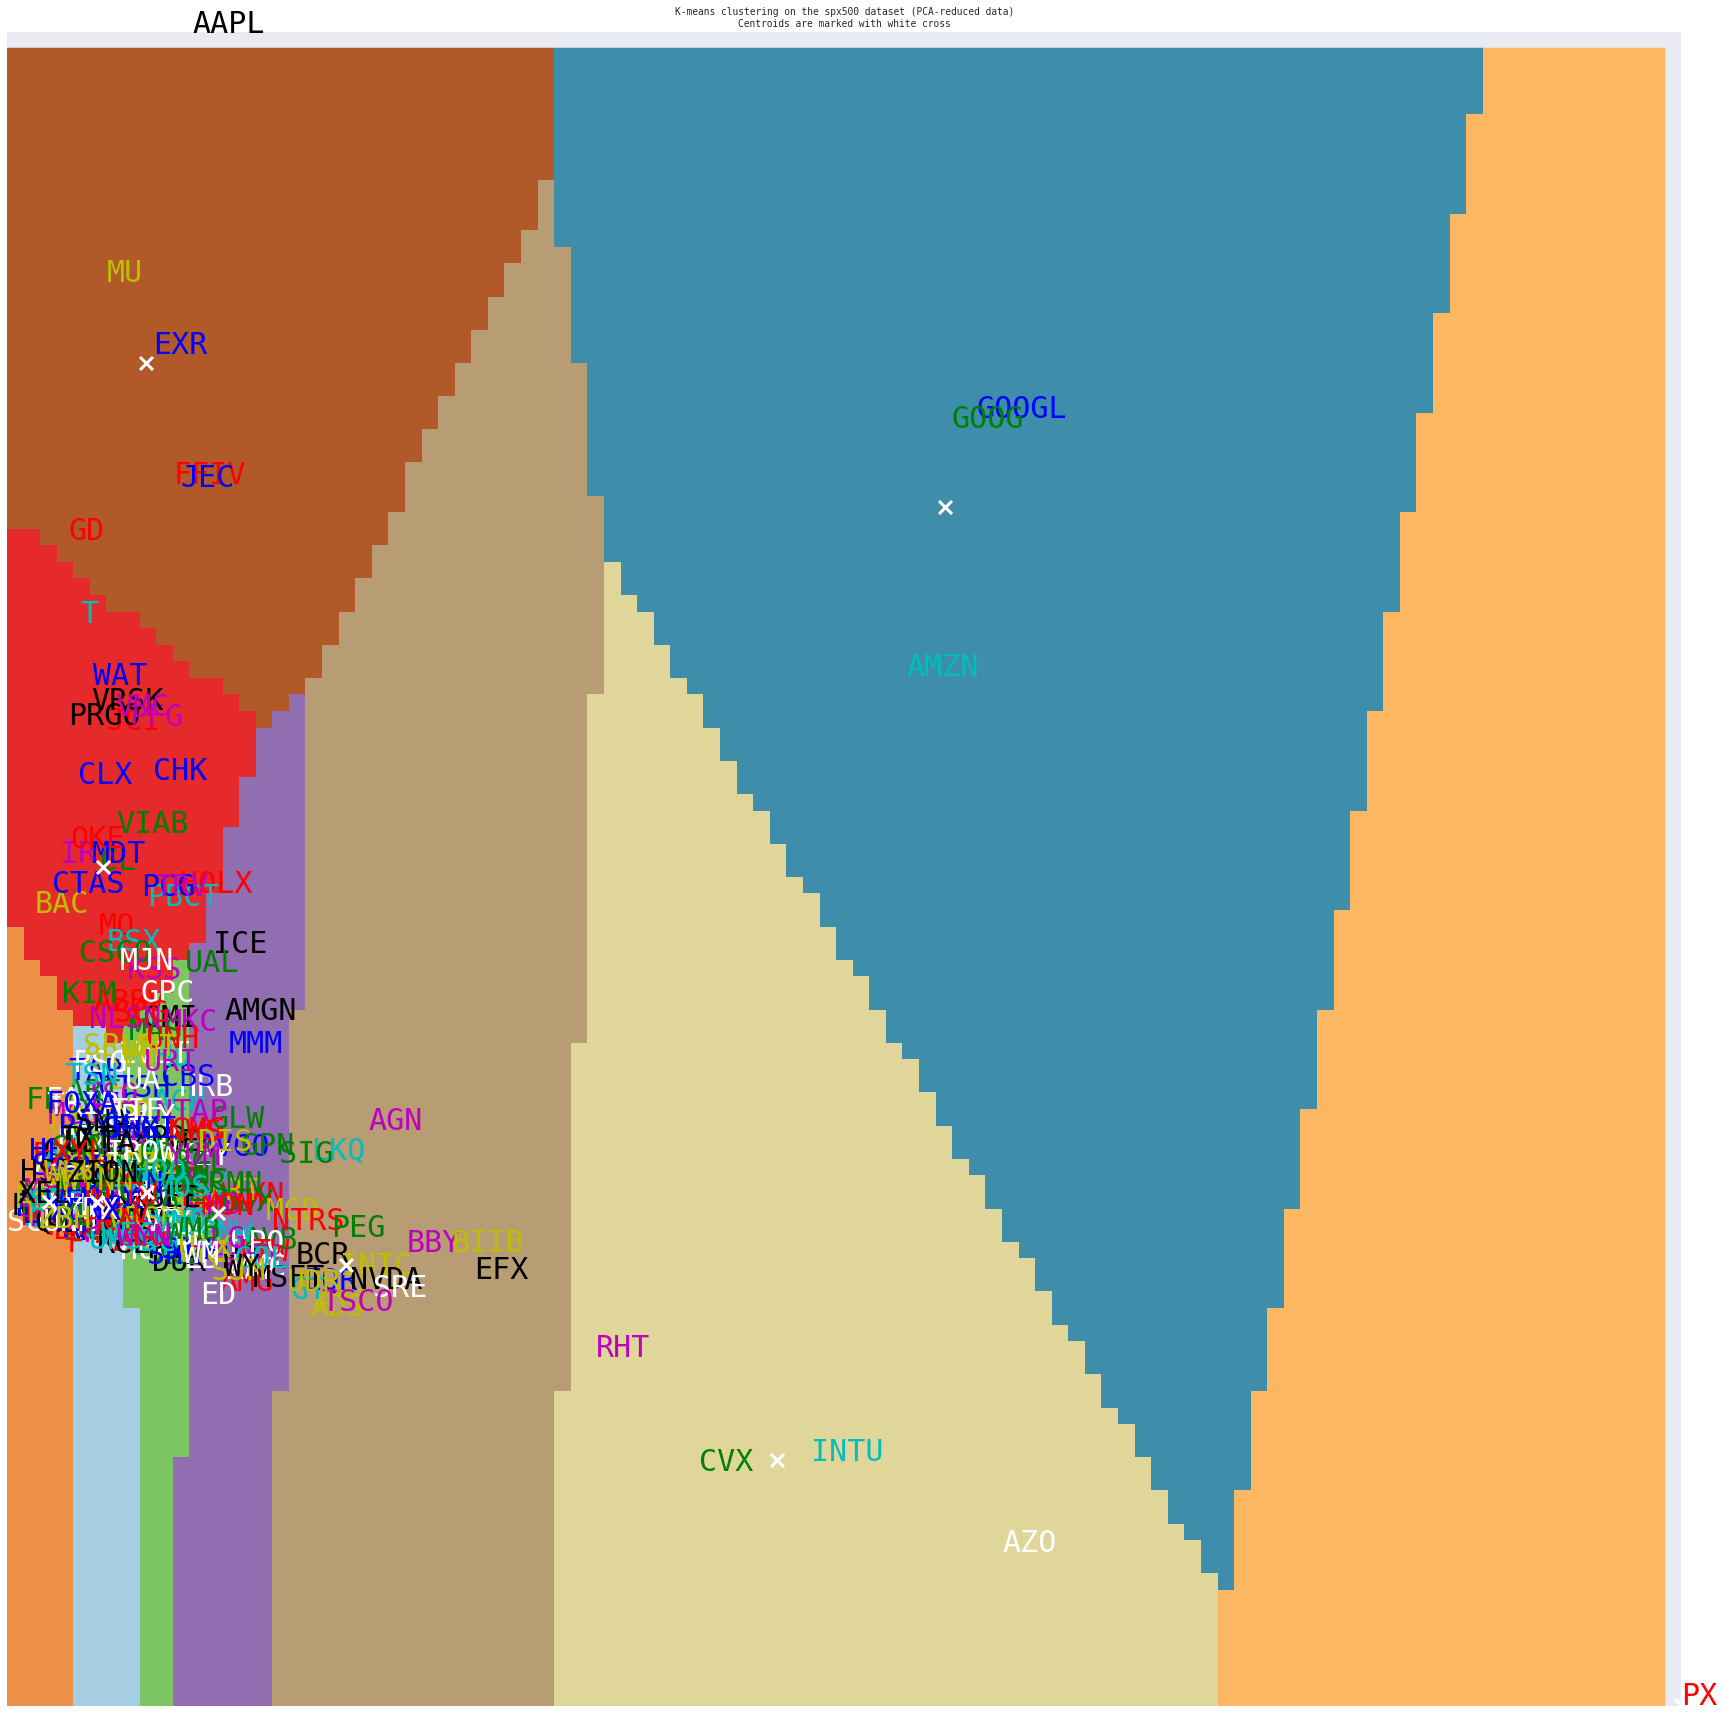

In [90]:
group_plot( all_df[cols].fillna(0).drop(67)) # droping Berkshire Hathaway

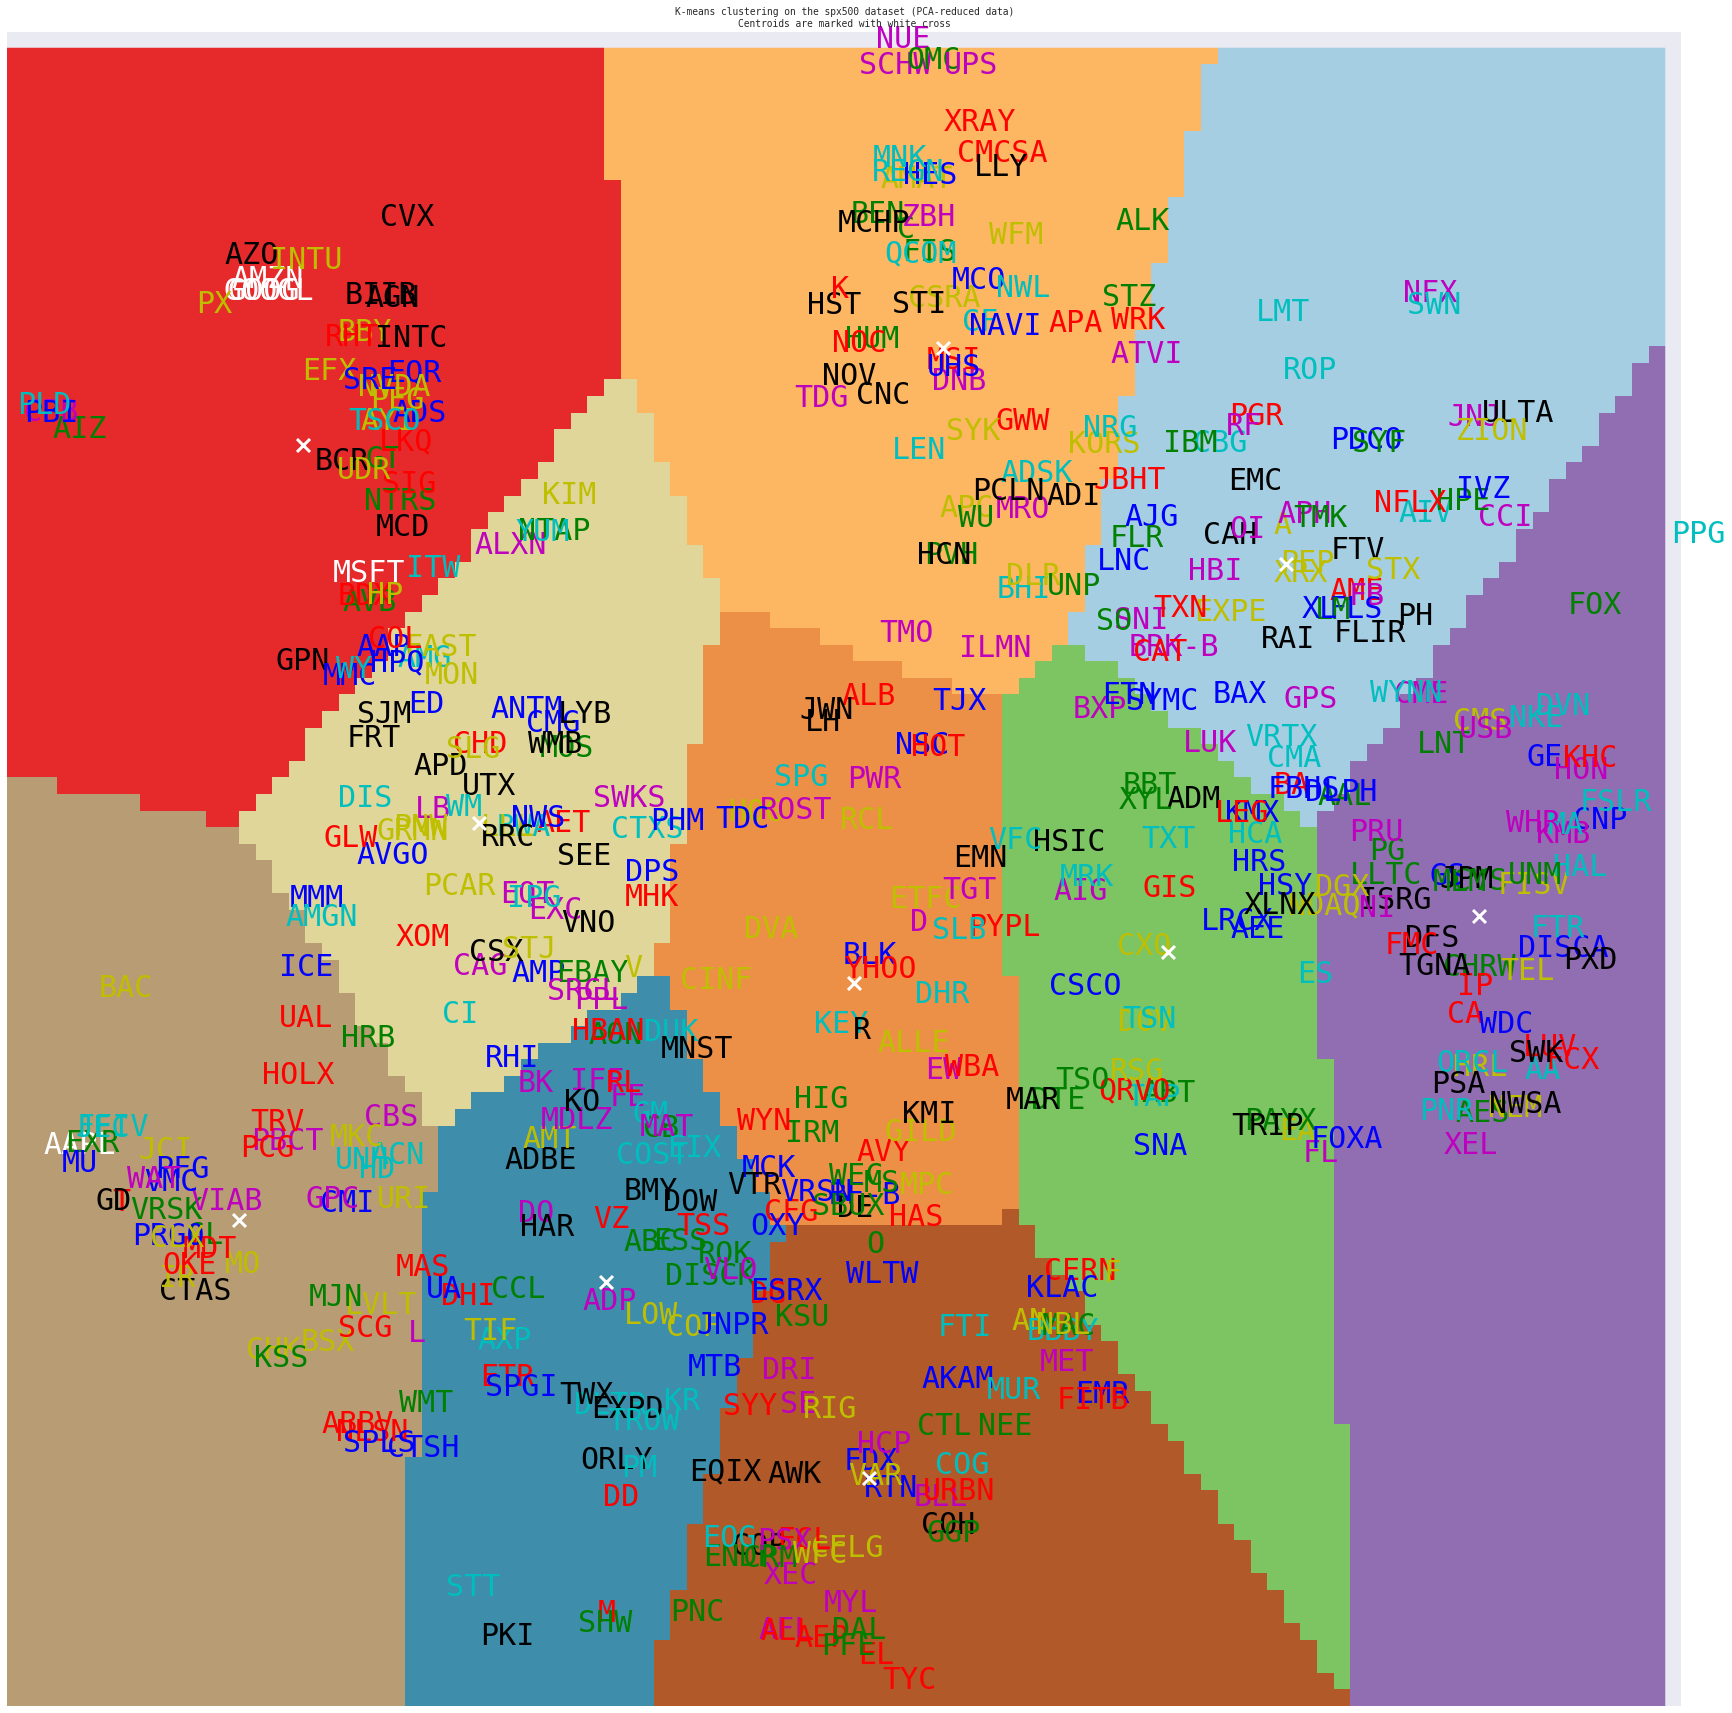

In [129]:
group_plot_TSNE( all_df[cols].fillna(0).drop(67)) # droping Berkshire Hathaway

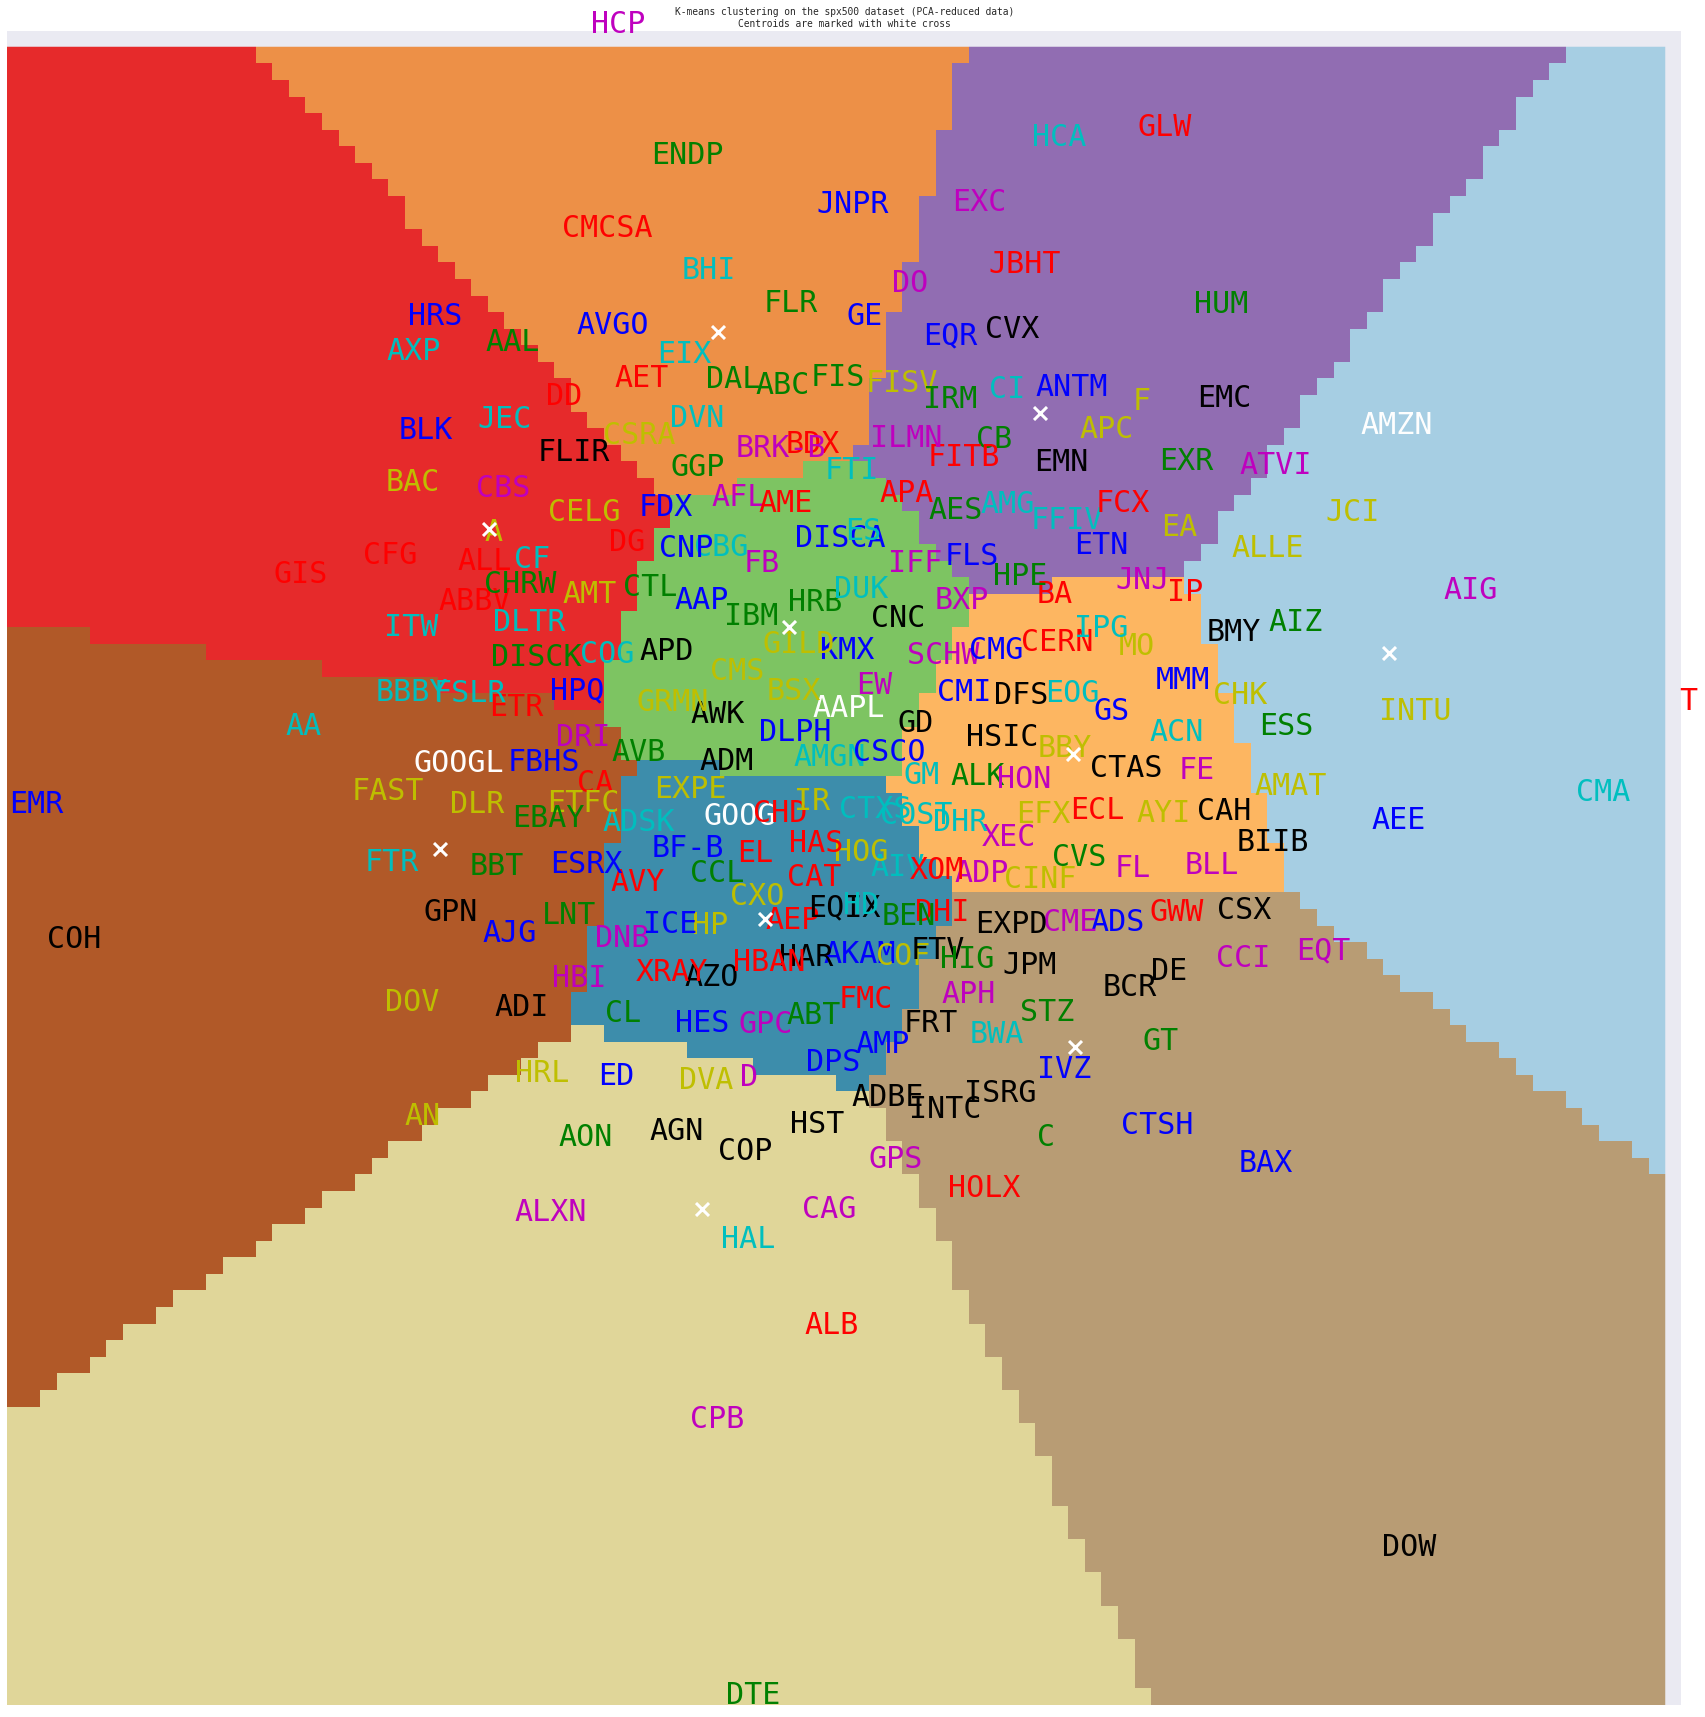

In [128]:
from sklearn.manifold import TSNE
def group_plot_TSNE(X):
    # h is the step siz
    h_n = 100
    reduced_data = TSNE(n_components=2).fit_transform(X)
    kmeans = KMeans(n_clusters=10, random_state=0).fit(reduced_data)
    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].
    offset = 0.3
    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - offset, reduced_data[:, 0].max() + offset
    y_min, y_max = reduced_data[:, 1].min() - offset, reduced_data[:, 1].max() + offset
    xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/h_n), np.arange(y_min, y_max, (y_max-y_min)/h_n))

    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.figure(figsize=(30,30))
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    #plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=10)


    count = 0
    colors = "bgrcmykw"
    special_list = ["AAPL", "MSFT", "GOOG", "GOOGL", "DELL", "AMZN"]
    for i,j in zip(reduced_data[:, 0],reduced_data[:, 1]):
        corr = 0  # adds a little correction to put annotation in marker's centrum
        ticker = spx500_constituents_pct_change.columns[count]
        if "Sector_id" in X.columns:
            plt.annotate(ticker,  xy=(i + corr, j + corr), size= 30, color=colors[X["Sector_id"][count]])
            
        else:
            if ticker in special_list:
                plt.annotate(ticker,  xy=(i + corr, j + corr), size= 30, color='w')
            else:
                plt.annotate(ticker,  xy=(i + corr, j + corr), size= 30, color=colors[count%7])
        count += 1
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('K-means clustering on the spx500 dataset (PCA-reduced data)\n'
              'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()
group_plot_TSNE(spx500_constituents_pct_change.fillna(0))

In [127]:
"Sector_id" in all_df.columns

True

In [124]:
all_df.columns

Index([u'Symbol', u'Name', u'Sector', u'Price', u'Dividend Yield',
       u'Price/Earnings', u'Earnings/Share', u'Book Value', u'52 week low',
       u'52 week high', u'Market Cap', u'EBITDA', u'Price/Sales',
       u'Price/Book', u'SEC Filings', u'annual_gain_pct', u'Sector_id',
       u'Consumer Discretionary', u'Consumer Staples', u'Energy',
       u'Financials', u'Health Care', u'Industrials',
       u'Information Technology', u'Materials', u'Telecommunications Services',
       u'Utilities'],
      dtype='object')